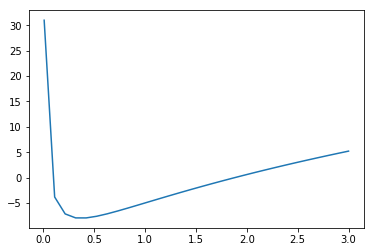

In [4]:
from Common import *

plt.plot(x_values, f_values)

In [2]:
#Dichotomy

x_bounds = np.array([0.01, 3])
i = 1

while f(x_bounds[i - 1]) * f(x_bounds[i]) >= 0:
    x_bounds = np.append(x_bounds, (x_bounds[i - 1] + x_bounds[i]) / 2)
    i = i + 1

print(x_bounds[-1], x_bounds[-2])
print(f(x_bounds[-1]), f(x_bounds[-2]))

1.505 3.0
-2.0459077099366416 5.2125206144464045


In [3]:
#Check all conditions

def check_Lipschitz(interval):
    x = x_values[interval]
    xwave = x_values[interval + 1]
    q = 15
    temp_q = 0
    q_samples = 10000
    for i in range(q_samples):
        diff = (i + 1) * (xwave - x) / (2 * (q_samples))
        left = (x + xwave) / 2 - diff
        right = left + 2 * diff
        temp_q = abs((phi(right) - phi(left)) / (right - left))
        #print("Calculating q on interval [{0}; {1}]; q_{2} = {3}".format(left, right, i, temp_q))
        if (temp_q < q):
            q = temp_q
            
    if (q < 1):
        print("Lipschitz hypothesis satisfied with q =", q)
    else:
        print("Lipschitz hypothesis not satisfied with q =", q)
    return q
        
def check_phi_prime(interval):
    x = x_values[interval]
    xwave = x_values[interval + 1]
    max_phi_prime = 0
    cur_phi_prime = 0
    for cur_x in np.linspace(x, xwave, 300):
        cur_phi_prime = abs(phi_prime(cur_x))
        if (cur_phi_prime > max_phi_prime):
            max_phi_prime = cur_phi_prime
    print("max|phi'(x)| =", max_phi_prime)
    return max_phi_prime

#Solve the equation using simple iteration method

def find_root(interval):
    x_left = x_values[interval]
    x_right = x_values[interval + 1]
    lam = f(x_left) / f(x_right)
    old_x = (x_left - lam * x_right) / (1 - lam)
    #old_x = (x_left + x_right) / 2
    new_x = phi(old_x)
    m = abs(new_x - old_x)
    print("x[0] =", old_x, "; x[1] =", new_x)
    num_iter = 1

    while (abs(new_x - old_x) >= eps):
        old_x = new_x
        new_x = phi(old_x)
        num_iter = num_iter + 1

    print("X* =", new_x, "; f(X*) =", f(new_x))
    print("|x^(k+1) - x^k| =", abs(new_x - old_x))
    print("Number of iterations:", num_iter)
    return m

for i in intervals:
    interval = int(i)
    print("Interval #", interval + 1)
    print("Interval borders:", x_values[interval], x_values[interval + 1])
    m = find_root(interval)
    print()
    q = check_Lipschitz(interval)
    max_prime = check_phi_prime(interval)
    print()
    print("m =", m)
    print("q =", q)
    print("delta =", delta)
    print()
    print("m / (1 - q) =", abs(m / (1 - q)))
    if abs(m / (1 - q)) <= delta:
        print("m / (1 - q) <= delta")
    else:
        print("m / (1 - q) > delta")
    print()
    

Interval # 1
Interval borders: 0.01 0.11310344827586206
x[0] = 0.10177199332476651 ; x[1] = 0.16908975421753134
X* = 1.8832427963333598 ; f(X*) = 1.979909976590477e-05
|x^(k+1) - x^k| = 9.817496610331489e-06
Number of iterations: 26

Lipschitz hypothesis not satisfied with q = 2.0752517730805766
max|phi'(x)| = 4.1241213808479875

m = 0.06731776089276482
q = 2.0752517730805766
delta = 0.09966666666666667

m / (1 - q) = 0.06260651000825665
m / (1 - q) <= delta

Interval # 19
Interval borders: 1.8658620689655172 1.9689655172413794
x[0] = 1.8833925540201686 ; x[1] = 1.8831417865443285
X* = 1.8832364853967574 ; f(X*) = -1.3034911175324737e-05
|x^(k+1) - x^k| = 6.46343145449535e-06
Number of iterations: 9

Lipschitz hypothesis satisfied with q = 0.6317888659999273
max|phi'(x)| = 0.6332096062253301

m = 0.00025076747584007464
q = 0.6317888659999273
delta = 0.09966666666666667

m / (1 - q) = 0.0006810426211610026
m / (1 - q) <= delta

